In [ ]:
!pip install lemon-explain[all]

In [1]:
import lemon

# Introduction

In this notebook we will see how one can use LEMON to explain entity matching model predictions.
To ease quick experimentation the LEMON library also contains some convenient functionally for fetching common datasets and using some common matchers in `lemon.utils`.

# Dataset

In [2]:
# Will download and load the Abt-Buy dataset
dataset = lemon.utils.datasets.deepmatcher.textual_abt_buy()

# Explain Magellan Model

## Train

In [3]:
matcher = lemon.utils.matchers.MagellanMatcher()
matcher.fit(
    dataset.train.records.a,
    dataset.train.records.b,
    dataset.train.record_id_pairs,
    dataset.train.labels,
)

## Evaluate

In [4]:
matcher.evaluate(
    dataset.test.records.a,
    dataset.test.records.b,
    dataset.test.record_id_pairs,
    dataset.test.labels,
)

{'precision': 0.7904761904761904,
 'recall': 0.4029126213592233,
 'f1': 0.5337620578778135}

## Explain

name,sony pink cyber-shot 7.2 megapixel digital camera dscw120p
description,sony pink cyber-shot 7.2 megapixel digital camera dscw120p 7.2 megapixel 4x optical zoom 2.5 ' tft lcd 15 mb internal memory face detection super steadyshot image stabilization smile shutter mode smart zoom pink finish
price,
name,olympus fe-360 digital camera pink 226540
description,8 megapixel 16:9 3x optical zoom 4x digital zoom 2.5 ' color lcd
price,104.95

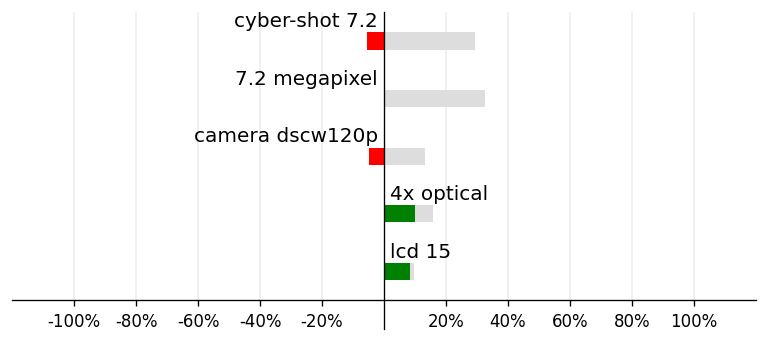
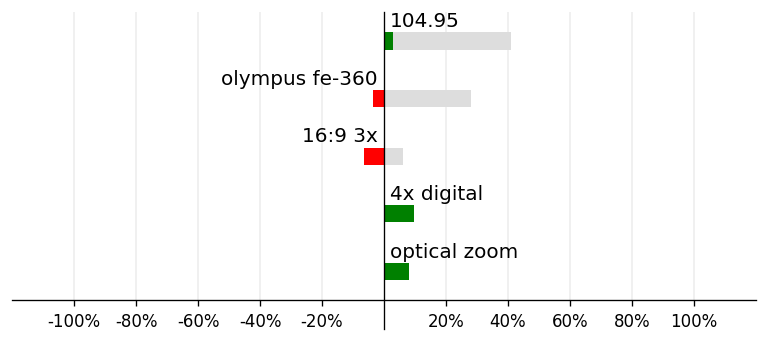

In [5]:
exp = lemon.explain(
    dataset.records.a,
    dataset.records.b,
    dataset.test.record_id_pairs.iloc[0:1],
    matcher.predict_proba,
)
exp

name,sony pink cyber-shot 7.2 megapixel digital camera dscw120p
description,sony pink cyber-shot 7.2 megapixel digital camera dscw120p 7.2 megapixel 4x optical zoom 2.5 ' tft lcd 15 mb internal memory face detection super steadyshot image stabilization smile shutter mode smart zoom pink finish
price,
name,olympus fe-360 digital camera pink 226540
description,8 megapixel 16:9 3x optical zoom 4x digital zoom 2.5 ' color lcd
price,104.95

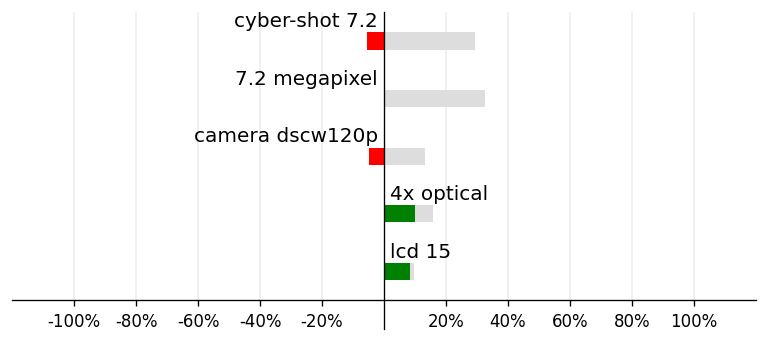
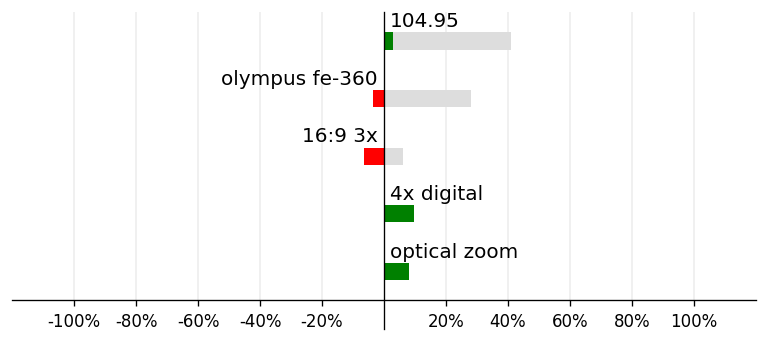

In [6]:
# Explanations can optionally be saved and loaded
exp.save("exp.json")
lemon.MatchingAttributionExplanation.load("exp.json")

# Explain Transformer Model

You are recommended to have a GPU to run this section

## Train

In [7]:
import transformers
transformers.logging.disable_default_handler() # Silence excessive logging

matcher = lemon.utils.matchers.TransformerMatcher(
    "google/bert_uncased_L-4_H-256_A-4",
    tokenizer_args={"model_max_length": 256}
)
matcher.fit(
    dataset.train.records.a,
    dataset.train.records.b,
    dataset.train.record_id_pairs,
    dataset.train.labels,
    dataset.val.record_id_pairs,
    dataset.val.labels,
)

Some weights of the model checkpoint at google/bert_uncased_L-4_H-256_A-4 were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification w

Epoch,Training Loss,Validation Loss,F1,Precision,Recall
1,0.151900,0.162366,0.714286,0.725000,0.703883
2,0.117500,0.128622,0.787330,0.737288,0.844660
3,0.133400,0.136580,0.774869,0.840909,0.718447
4,0.074500,0.122949,0.808824,0.816832,0.800971
5,0.072700,0.121917,0.823245,0.821256,0.825243


/home/nils/git/lemon/.venv/lib/python3.8/site-packages/transformers/trainer.py:1312: FutureWarning: Non-finite norm encountered in torch.nn.utils.clip_grad_norm_; continuing anyway. Note that the default behavior will change in a future release to error out if a non-finite total norm is encountered. At that point, setting error_if_nonfinite=false will be required to retain the old behavior.
  nn.utils.clip_grad_norm_(


## Evaluate

In [8]:
matcher.evaluate(
    dataset.test.records.a,
    dataset.test.records.b,
    dataset.test.record_id_pairs,
    dataset.test.labels,
)

{'precision': 0.7873303167420814,
 'recall': 0.8446601941747572,
 'f1': 0.8149882903981265}

## Explain

name,sony pink cyber-shot 7.2 megapixel digital camera dscw120p
description,sony pink cyber-shot 7.2 megapixel digital camera dscw120p 7.2 megapixel 4x optical zoom 2.5 ' tft lcd 15 mb internal memory face detection super steadyshot image stabilization smile shutter mode smart zoom pink finish
price,
name,olympus fe-360 digital camera pink 226540
description,8 megapixel 16:9 3x optical zoom 4x digital zoom 2.5 ' color lcd
price,104.95

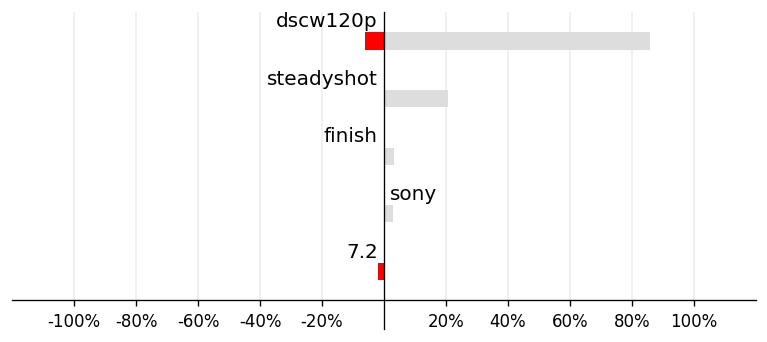
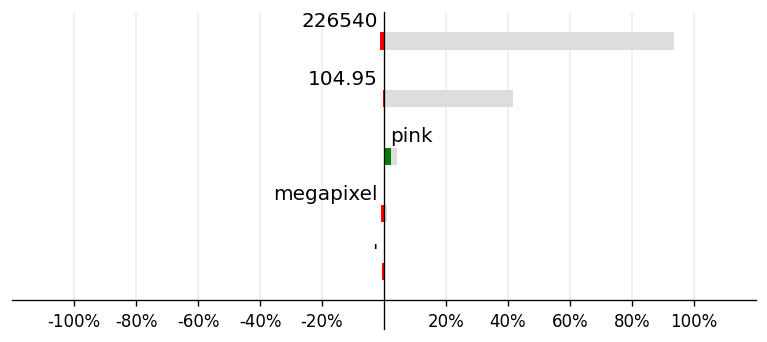

In [9]:
lemon.explain(
    dataset.records.a,
    dataset.records.b,
    dataset.test.record_id_pairs.iloc[0:1],
    matcher.predict_proba,
)